Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5002 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3749 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3355 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3135 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2953 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2789 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2697 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2574 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2481 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

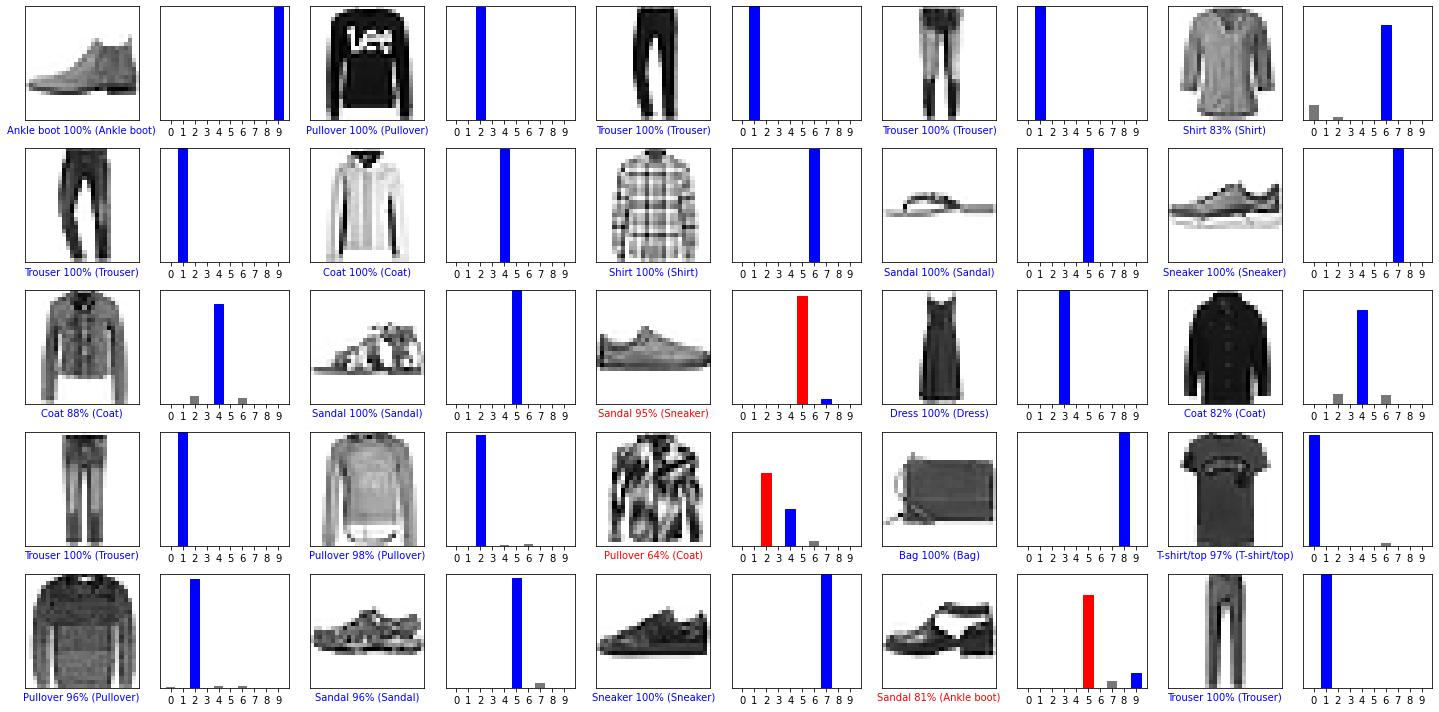

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#download data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#membuat class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#eksplor data
train_images.shape

#eksplor label
len(train_labels)

#train label
train_labels

#eksplor data test
test_images.shape

#train label test
len(test_labels)

##prepocessing data
#plt.figure()
#plt.imshow(train_images[0])
#plt.colorbar()
#plt.grid(False)
#plt.show()
 
#merubah nilai pixel 0-255 menjadi 0-1 dengan membagi 255
train_images = train_images / 255.0
test_images = test_images / 255.0

##test data awal
#plt.figure(figsize=(10,10))
#for i in range(25):
#    plt.subplot(5,5,i+1)
#    plt.xticks([])
#    plt.yticks([])
#    plt.grid(False)
#    plt.imshow(train_images[i], cmap=plt.cm.binary)
#    plt.xlabel(class_names[train_labels[i]])
#plt.show()

#membuat layer 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #data pixel 28 x 28 yang semula dua array dijadikan 1 array
    keras.layers.Dense(128, activation='relu'), #membuat layer 128 node
    keras.layers.Dense(10, activation='softmax') #membuat layer 10 node 
])

#melakukan optimasi dan loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#melakukan training data image & label ke data set
model.fit(train_images, train_labels, epochs=10)


#mebandingkan nilai akurasi model yang dibuat terhadap data test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#print('\nTest accuracy:', test_acc)

#melakukan prediksi
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

#visualisai prediksi
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

##prediksi gambar ke 0
#i = 0
#plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
#plt.show()

## Plot the first X test images, their predicted labels, and the true labels.
## Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# 